<a href="https://colab.research.google.com/github/spyder5632/test/blob/main/yolov8_vehicle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Install The Libraries

In [2]:
!pip install ultralytics
!pip install -U ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 749.1/749.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 994.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [6]:
# Save the notebook
!cp '/content/yolov8-vehicle.ipynb' '/content/drive/My Drive/'


cp: cannot stat '/content/yolov8-vehicle.ipynb': No such file or directory


# Import the Libraries

In [3]:
import os
import random

from ultralytics import YOLO
import cv2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

# Data Visualisation

In [4]:
train_images = "/content/drive/MyDrive/trafic_data/train/images"
train_labels = "/content/drive/MyDrive/trafic_data/train/labels"

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Check the images and objects that needs to be detected

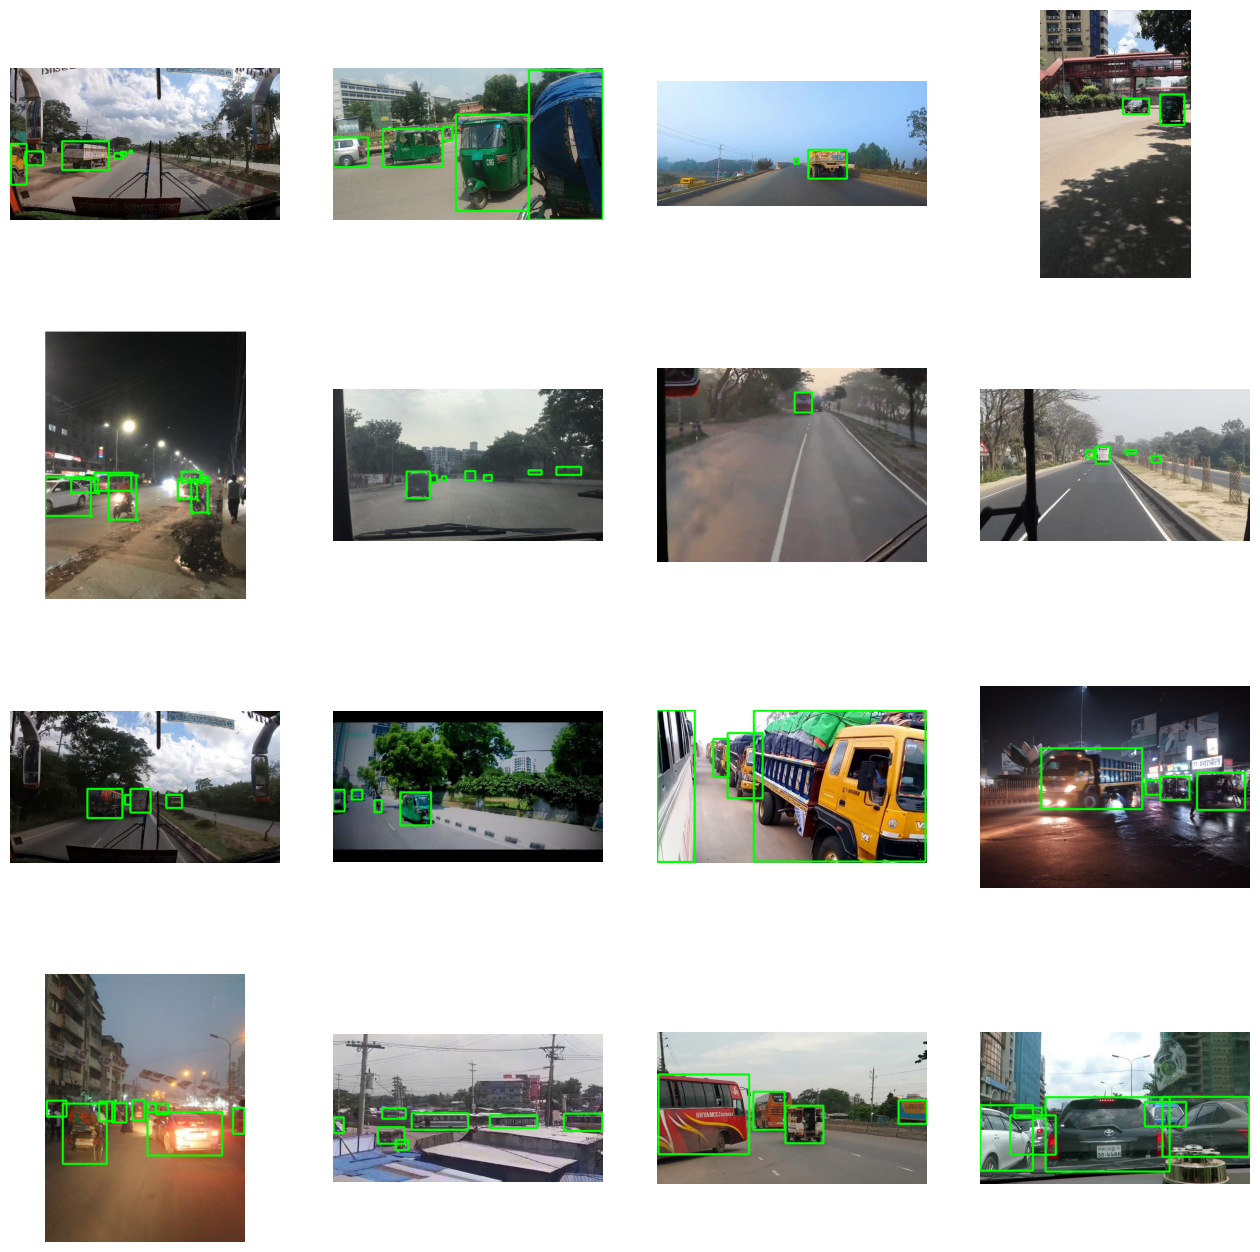

In [7]:
def load_labels(image_file, train_labels):
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)

    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    return labels

def plot_object_detections(ax, image, labels):
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.axis('off')

# Set paths
train_images = "/content/drive/MyDrive/trafic_data/train/images"
train_labels = "/content/drive/MyDrive/trafic_data/train/labels"

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row, col = divmod(i, 4)

    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    labels = load_labels(image_file, train_labels)

    # Plot object detections
    plot_object_detections(axs[row, col], image, labels)

plt.show()

<div style="background-color: #8BF2D6; font-family: Arial, sans-serif; padding: 20px; color: #333;">

<h1>Code Explanation:</h1>

<p style="color: #333;">
        This code is designed to visualize object detection results on a set of randomly selected images. Let's break down the key components:
    </p>

<h2>Functions:</h2>

<code style="background-color: #D8F5F4; border: 1px solid #ddd; padding: 10px; display: block; margin-bottom: 20px; overflow-x: auto; color: #333;">
<p>
<strong>load_labels(image_file, train_labels):</strong> This function loads object labels from a corresponding text file.
        </p>

<p>
<strong>plot_object_detections(ax, image, labels):</strong> This function plots object detections on an image using OpenCV.
        </p>
    </code>

<h2>Main Execution:</h2>

<code style="background-color: #D8F5F4; border: 1px solid #ddd; padding: 10px; display: block; margin-bottom: 20px; overflow-x: auto; color: #333;">
        <p>
            The main part of the code reads a set of image files from a specified directory, randomly selects 16 images, and then visualizes the object detection results on these images.
        </p>
    </code>

<h2>Setup and Visualization:</h2>

<code style="background-color: #D8F5F4; border: 1px solid #ddd; padding: 10px; display: block; margin-bottom: 20px; overflow-x: auto; color: #333;">
<p>
            The necessary paths for images and labels are set, and a 4x4 subplot is created for visualization. The code then iterates over the randomly selected images, loads the image and corresponding labels, and plots the object detections on the images.
        </p>
    </code>
    
</div>

## Check numbers of unqique objects

In [8]:
with open('/content/drive/MyDrive/trafic_data/data_1.yaml', 'r') as f:

    data = f.read()

print(data)

train: ../train/images
val: ../valid/images

nc: 21
names: ['ambulance', 'army vehicle', 'auto rickshaw', 'bicycle', 'bus', 'car', 'garbagevan', 'human hauler', 'minibus', 'minivan', 'motorbike', 'pickup', 'policecar', 'rickshaw', 'scooter', 'suv', 'taxi', 'three wheelers -CNG-', 'truck', 'van', 'wheelbarrow']


<p style = 'font-size: 16px; font-family: Verdana, sans-serif; color: #Ff0004; background-color: #E1FBFA; padding: 10px'> There are 21 different vehicles in the dataset. The model will be trained to recognize and classify objects into one of the 21 specified vehicles. The training images are stored in the 'train' directory, and the validation images are stored in the 'valid' directory. The class names represent the different objects or entities the model is trained to detect. The list includes classes such as 'ambulance', 'bicycle', 'car', 'bus', 'scooter', 'truck', etc. There are a total of 21 classes. </p>

## Check shape of Image

In [9]:
h, w, c = image.shape

print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 640x360 and 3 channels.


# Try Pre-trained YOLOv8 For Detection

100%|██████████| 131M/131M [00:01<00:00, 133MB/s]



image 1/1 /content/drive/MyDrive/trafic_data/train/images/Numan_-475-_jpg.rf.c34be6b546bf3957d950e7c94e6bf899.jpg: 416x256 3 cars, 1 truck, 1517.9ms
Speed: 11.7ms preprocess, 1517.9ms inference, 30.7ms postprocess per image at shape (1, 3, 416, 256)


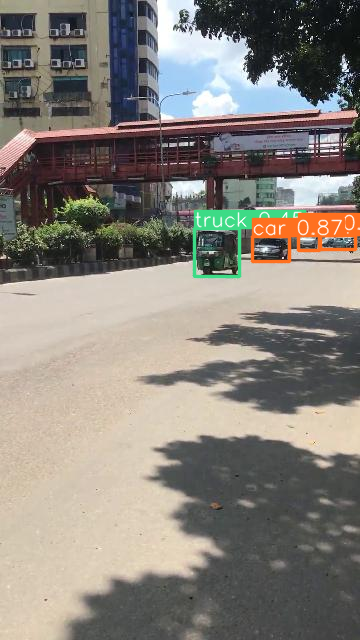

In [ ]:
model = YOLO("yolov8x.pt")

result_predict = model.predict(source = os.path.join(train_images, random_images[0]), imgsz=(416))

plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))


0: 416x256 3 cars, 1 truck, 1377.1ms
Speed: 2.3ms preprocess, 1377.1ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 256)

0: 256x416 7 persons, 2 cars, 1 bus, 2 trucks, 1 umbrella, 1327.3ms
Speed: 3.7ms preprocess, 1327.3ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 416)

0: 416x320 5 persons, 10 cars, 1 bus, 1689.0ms
Speed: 3.9ms preprocess, 1689.0ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 320)

0: 256x416 2 cars, 2 trucks, 2002.6ms
Speed: 3.7ms preprocess, 2002.6ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 train, 1 truck, 1 umbrella, 2104.5ms
Speed: 2.1ms preprocess, 2104.5ms inference, 3.6ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 2 cars, 1413.4ms
Speed: 2.3ms preprocess, 1413.4ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 2 buss, 2 trucks, 1308.3ms
Speed: 2.1ms preprocess, 1308.3ms inference, 1.3ms postprocess per image at shape (1, 3, 256,

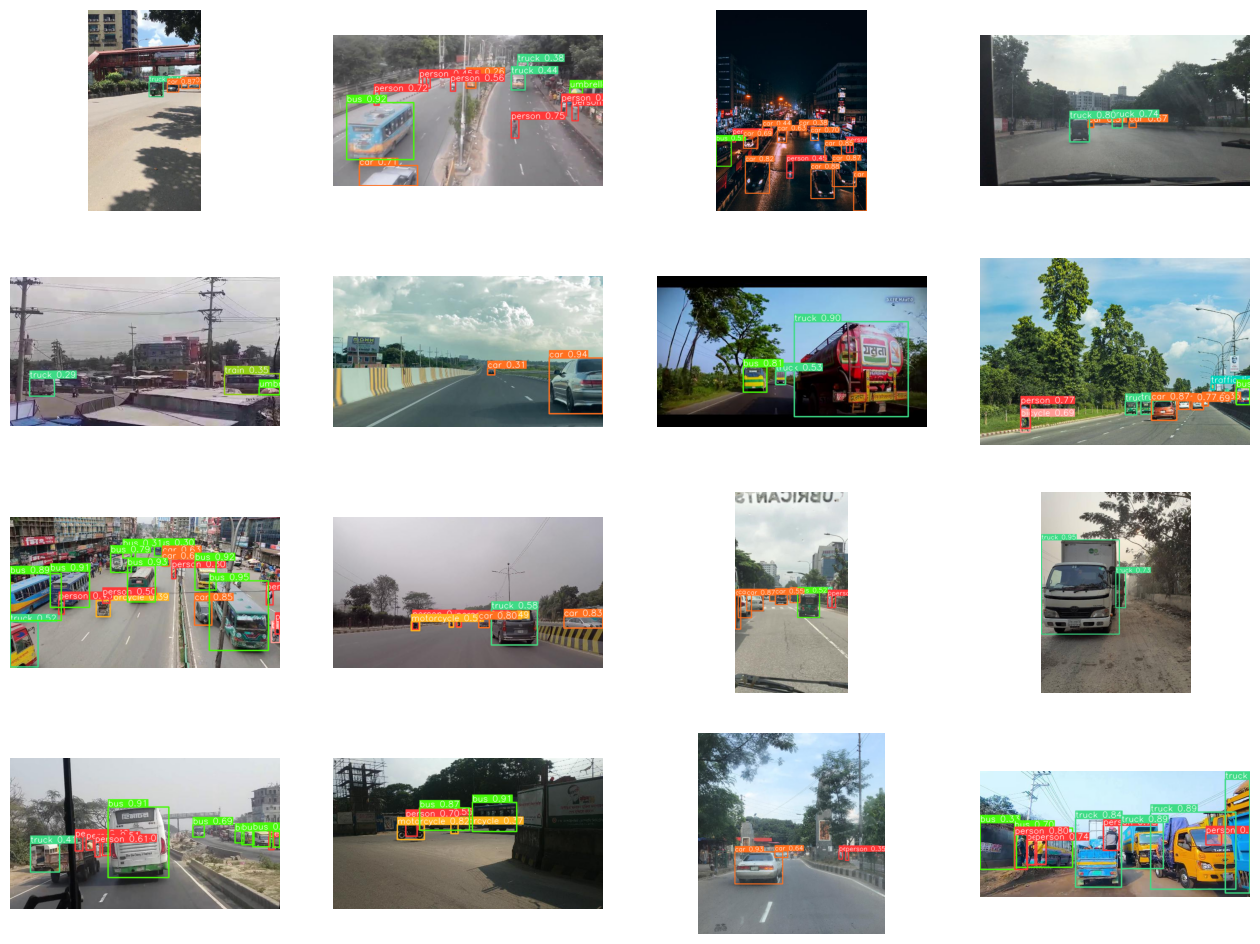

In [ ]:
fig, axs = plt.subplots(4, 4, figsize = (16, 12))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row, col = divmod(i, 4)

    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    result_predict = model.predict(image, imgsz=(416))

    plot = result_predict[0].plot()
    plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)

    axs[row,col].imshow(plot)
    axs[row,col].axis('off')

plt.show()

# Training the model

<div  style = 'font-size: 16px; font-family: Verdana, sans-serif; color: #Ff0004; background-color: #E1FBFA; padding: 10px'>
    
Optimizing the performance of an object detection model, such as YOLOv8, involves a thoughtful exploration of training parameters and optimizer choices. Mean Average Precision (mAP) serves as a comprehensive metric, considering both precision and recall across different object categories, offering a holistic evaluation of the algorithm's effectiveness.

Should the obtained mAP after the final epoch fall short of expectations, several strategies can be employed to enhance results:

<h4 style = 'color: #245EEE'>Extend Training Epochs:</h4>
<li style = 'border: 1px solid #ddd; background-color: #D0FEFF; padding: 10px'>Consider increasing the number of training epochs (--epochs). This allows the model to learn more intricate patterns, potentially improving its performance.</li>

<h4  style = 'color: #245EEE'>Experiment with Parameters:</h4>
Explore the impact of different parameter values on convergence and generalization:
<ul style = 'border: 1px solid #ddd; background-color: #D0FEFF'>
<li>Batch Size (--batch-size): Adjust to find an optimal value.</li>
<li>Initial Learning Rate (lr0): Tune --lr0 for controlling the initial learning rate.</li>
<li>Learning Rate Range (lrf): Experiment with --lrf values to find an effective learning rate schedule.</li>
</ul>
    
<h4  style = 'color: #245EEE'>Optimize Optimizers:</h4>
<li style = 'border: 1px solid #ddd; background-color: #D0FEFF; padding: 10px'>Switching optimizers can influence convergence and results. Ultralytics YOLOv8 supports SGD, Adam, and RMSprop. Modify the --optimizer argument to explore different optimizers.</li>

<h4  style = 'color: #245EEE'>Additional Options</h4>
<li style = 'border: 1px solid #ddd; background-color: #D0FEFF; padding: 10px'>For resuming interrupted trainings and additional training options, refer to the Ultralytics YOLOv8 documentation.</li>
    
</div>

In [10]:
model = YOLO('yolov8x.pt')

# Training the model

# I already trained so I will comment this out. I will use the saved model during test.


model.train(data = '/content/drive/MyDrive/trafic_data/data_1.yaml',
            epochs = 30,
            imgsz = h,
            seed = 42,
            batch = 8,
            workers = 4)


100%|██████████| 131M/131M [00:01<00:00, 123MB/s]


Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/drive/MyDrive/trafic_data/data_1.yaml, epochs=30, time=None, patience=100, batch=8, imgsz=360, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

100%|██████████| 755k/755k [00:00<00:00, 15.7MB/s]


Overriding model.yaml nc=80 with nc=21

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytic

train: Scanning /content/drive/MyDrive/trafic_data/train/labels... 1371 images, 2 backgrounds, 0 corrupt:  51%|█████     | 1371/2704 [07:31<07:18,  3.04it/s]


KeyboardInterrupt: 

# Model Performance

<div style="background-color: #8BF2D6; font-family: Arial, sans-serif; padding: 20px; color: #333;">

<h1>Training Loss Metrics:</h1>

<h2 style="color: #0066cc;">Train Box Loss:</h2>
<p  style="background-color: #D8F5F4; border: 1px solid #ddd; padding: 10px; display: block; margin-bottom: 20px; overflow-x: auto; color: #333; font-size: 16px">
    The train box loss metric measures the difference between the predicted bounding boxes and the actual bounding boxes of the objects in the training data. A lower box loss means that the model's predicted bounding boxes more closely align with the actual bounding boxes.
</p>

<h2 style="color: #0066cc;">Train Class Loss:</h2>
<p  style="background-color: #D8F5F4; border: 1px solid #ddd; padding: 10px; display: block; margin-bottom: 20px; overflow-x: auto; color: #333; font-size: 16px">
    The train class loss metric measures the difference between the predicted class probabilities and the actual class labels of the objects in the training data. A lower class loss means that the model's predicted class probabilities more closely align with the actual class labels.
</p>

<h2 style="color: #0066cc;">Train DFL Loss:</h2>
<p  style="background-color: #D8F5F4; border: 1px solid #ddd; padding: 10px; display: block; margin-bottom: 20px; overflow-x: auto; color: #333; font-size: 16px">
    The train DFL (Dynamic Feature Learning) loss metric measures the difference between the predicted feature maps and the actual feature maps of the objects in the training data. A lower DFL loss means that the model's predicted feature maps more closely align with the actual feature maps.
</p>

<h1>Evaluation Metrics:</h1>

<h2 style="color: #0066cc;">Metrics Precision (B):</h2>
<p  style="background-color: #D8F5F4; border: 1px solid #ddd; padding: 10px; display: block; margin-bottom: 20px; overflow-x: auto; color: #333; font-size: 16px">
    The metrics precision (B) metric measures the proportion of true positive detections among all the predicted bounding boxes. A higher precision means that the model is better at correctly identifying true positive detections and minimizing false positives.
</p>

<h2 style="color: #0066cc;">Metrics Recall (B):</h2>
<p  style="background-color: #D8F5F4; border: 1px solid #ddd; padding: 10px; display: block; margin-bottom: 20px; overflow-x: auto; color: #333; font-size: 16px">
    The metrics recall (B) metric measures the proportion of true positive detections among all the actual bounding boxes. A higher recall means that the model is better at correctly identifying all true positive detections and minimizing false negatives.
</p>

<h2 style="color: #0066cc;">Metrics mAP50 (B):</h2>
<p  style="background-color: #D8F5F4; border: 1px solid #ddd; padding: 10px; display: block; margin-bottom: 20px; overflow-x: auto; color: #333; font-size: 16px">
    The metrics mAP50 (B) metric measures the mean average precision of the model across different object categories, with a 50% intersection-over-union (IoU) threshold. A higher mAP50 means that the model is better at accurately detecting and localizing objects across different categories.
</p>

<h2 style="color: #0066cc;">Metrics mAP50-95 (B):</h2>
<p  style="background-color: #D8F5F4; border: 1px solid #ddd; padding: 10px; display: block; margin-bottom: 20px; overflow-x: auto; color: #333; font-size: 16px">
    The metrics mAP50-95 (B) metric measures the mean average precision of the model across different object categories, with IoU thresholds ranging from 50% to 95%. A higher mAP50-95 means that the model is better at accurately detecting and localizing objects across different categories with a wider range of IoU thresholds.
</p>
    
</div>


In [ ]:
df = pd.read_csv('/kaggle/input/road-vehicles-files/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

<div style = 'font-size: 16px; font-family: Verdana, sans-serif; color: #000000; background-color: #8BF2D6; padding: 10px'>  
    
Let's break down the concept of a confusion matrix and its importance in evaluating the performance of a ship detection model using YOLO in simpler terms.

Imagine you have a computer program that looks at pictures taken from above and tries to find if there are ships in them. The confusion matrix is like a report card for this program. It helps us understand how well the program is doing.

Here's how the confusion matrix works:

<h3 style="color: #0066cc;">True Positives (TP):</h3>
    
 <p  style="background-color: #D8F5F4; border: 1px solid #ddd; padding: 10px; display: block; margin-bottom: 20px; overflow-x: auto; color: #333; font-size: 16px">These are the cases where the program correctly says, "Yes, there is a ship," and there really is a ship in the picture. </p>
    
<h3 style="color: #0066cc;">True Negatives (TN):</h3>

<p  style="background-color: #D8F5F4; border: 1px solid #ddd; padding: 10px; display: block; margin-bottom: 20px; overflow-x: auto; color: #333; font-size: 16px">These are the cases where the program correctly says, "No, there is no ship," and there isn't really a ship in the picture.</p>
    
<h3 style="color: #0066cc;">False Positives (FP):</h3>

<p  style="background-color: #D8F5F4; border: 1px solid #ddd; padding: 10px; display: block; margin-bottom: 20px; overflow-x: auto; color: #333; font-size: 16px">These are the cases where the program incorrectly says, "Yes, there is a ship," but there is actually no ship in the picture. It's a mistake.</p>
    
<h3 style="color: #0066cc;">False Negatives (FN):</h3>

<p  style="background-color: #D8F5F4; border: 1px solid #ddd; padding: 10px; display: block; margin-bottom: 20px; overflow-x: auto; color: #333; font-size: 16px">These are the cases where the program incorrectly says, "No, there is no ship," but there is actually a ship in the picture. Another mistake.</p>
  
</div>

In [ ]:
img = mpimg.imread('/kaggle/input/road-vehicles-files/confusion_matrix_normalized.png')

fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');

# Making Predictions on Test Images

In [ ]:
#model = YOLO('/kaggle/input/road-vehicles-files/yolov8x.pt')

In [ ]:
def ship_detect(img_path):

    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()

    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img

custom_image_dir = '/kaggle/input/road-vehicle-images-dataset/trafic_data/valid/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 9)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):

    # Compute the row and column index of the current subplot
    row_idx = i // 3
    col_idx = i % 3

    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = ship_detect(img_path)

    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)